# Projeto de Ciência de Dados: Analisando a População, PIB e Taxas de Homicídio Brasileiros de 2002 a 2016
### Datascience project: Analising Brazilian Population, GDP and Murder Rates from 2002 to 2016

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
dfpib1 = pd.read_excel("datasets/PIB dos Municípios - base de dados 2002-2009.xls")
dfpib2 = pd.read_excel('datasets/PIB dos Municípios - base de dados 2010-2017.xls')
dfhomi = pd.read_csv('datasets/homicidios.csv', sep=';')
dfhomi = dfhomi.rename(columns={'valor':'homicidios'})
dfpib2 = dfpib2[dfpib2.columns.values[:-3]]

## Juntando os datasets de taxas de homicídios e PIB
### Joining Murder rates and income datasets

In [3]:
df = pd.concat([dfpib1,dfpib2])

df = df.rename(columns={'Ano':'período', 'Código do Município':'cod'})
df = df[df['período']<2017]
# df = df.join(dfhomi.set_index('cod'), on='Código do Município')
df = pd.merge(df,dfhomi,how='left', on=['período', 'cod'])
df.head()

,período,Código da Grande Região,Nome da Grande Região,Código da Unidade da Federação,Sigla da Unidade da Federação,Nome da Unidade da Federação,cod,Nome do Município,Região Metropolitana,Código da Mesorregião,...,"Valor adicionado bruto da Agropecuária, \na preços correntes\n(R$ 1.000)","Valor adicionado bruto da Indústria,\na preços correntes\n(R$ 1.000)","Valor adicionado bruto dos Serviços,\na preços correntes \n- exceto Administração, defesa, educação e saúde públicas e seguridade social\n(R$ 1.000)","Valor adicionado bruto da Administração, defesa, educação e saúde públicas e seguridade social, \na preços correntes\n(R$ 1.000)","Valor adicionado bruto total, \na preços correntes\n(R$ 1.000)","Impostos, líquidos de subsídios, sobre produtos, \na preços correntes\n(R$ 1.000)","Produto Interno Bruto, \na preços correntes\n(R$ 1.000)","Produto Interno Bruto per capita, \na preços correntes\n(R$ 1,00)",nome,homicidios
0,2002,1,Norte,11,RO,Rondônia,1100015,Alta Floresta D'Oeste,NaN,1102,...,27013.223,9376.871,24651.113,42700.523,103741.729,7549.266,111290.995,4047.83,Alta Floresta D'Oeste,36.714763
1,2002,1,Norte,11,RO,Rondônia,1100023,Ariquemes,NaN,1102,...,28590.178,99922.936,161851.549,116562.182,406926.845,42665.972,449592.816,5667.37,Ariquemes,58.944887
2,2002,1,Norte,11,RO,Rondônia,1100031,Cabixi,NaN,1102,...,10883.801,1961.907,5128.876,11925.001,29899.585,1867.935,31767.520,4246.99,Cabixi,0.000000
3,2002,1,Norte,11,RO,Rondônia,1100049,Cacoal,NaN,1102,...,32810.376,98292.764,175748.703,117968.303,424820.146,49622.951,474443.097,6353.27,Cacoal,41.677310
4,2002,1,Norte,11,RO,Rondônia,1100056,Cerejeiras,NaN,1102,...,11283.793,6651.475,25306.009,27731.366,70972.643,8200.971,79173.614,4442.47,Cerejeiras,16.736402


In [4]:
# dftest = df[[df.columns.values[0],df.columns.values[6],df.columns.values[-4]]]
# dftest=dftest.rename(columns={'Ano':'período', 'Código do Município':'cod'})
# dftest.columns[1] = 'bb'#Ano Código d // cod, periodo
# dftest = pd.merge(dftest,dfhomi,how='left', on=['período', 'cod'])
# dftest[dftest['período']<2017]

In [5]:
dfpib1[dfpib1['Código do Município']==2611606]
dfhomi[dfhomi['cod']==2611606].head()

,cod,nome,período,homicidios
1431,2611606,Recife,1996,53.044289
7085,2611606,Recife,1997,73.565852
12578,2611606,Recife,1998,81.504120
18005,2611606,Recife,1999,65.670745
23556,2611606,Recife,2000,69.082613


## Agora lidando com os vários datasets populacionais
### Now dealing with the many population datasets

In [6]:
# as almost all of the following datasets require some minor tweaks in order to be correctly read, we will be reading one by one

#so, the codes are not strings, they are numbers, also without the zeroes, so we will need to fix this
# but first lets read all the datasets and make all their columns name the same

poplst = ['POP2016.xlsx','POP2015.xls','POP2014.xlsx', 'POP2013.xls', 'POP2012.xls','POP2011.xls','POP2009.xls',
          'POP2008.xls','POP2006.xls','POP2005.xls','POP2004.xls','POP2003.xls','POP2002.xls']
xls = pd.ExcelFile('datasets/pop/POP2016.xlsx')
df2016 = pd.read_excel(xls, 'Municípios', header =2)
df2016 = df2016[:5570]
df2016['período'] = 2016
xls = pd.ExcelFile('datasets/pop/POP2015.xls')
df2015 = pd.read_excel(xls, 'Municípios', header =2)
df2015 = df2015[:5570]
df2015['período'] = 2015
df2016.columns = df2015.columns
xls = pd.ExcelFile('datasets/pop/POP2014.xls')
df2014 = pd.read_excel(xls, 'Municípios', header =2)
df2014 = df2014[:5570]
df2014['período'] =  2014
df2014.columns = df2015.columns
xls = pd.ExcelFile('datasets/pop/POP2013.xls')
df2013 = pd.read_excel(xls, 'Municípios', header =1)
df2013 = df2013[:5568]
df2013['período'] =  2013
df2013.columns = df2015.columns
xls = pd.ExcelFile('datasets/pop/POP2012.xls')
df2012 = pd.read_excel(xls, 'TAB_DOU_Municípios (internet)', header =2)
df2012 = df2012[:5565]
df2012['período'] =  2012
df2012.columns = df2015.columns
xls = pd.ExcelFile('datasets/pop/POP2011.xls')
df2011 = pd.read_excel(xls, 'MUNICÍPIOS', header =2)
df2011 = df2011[0:5565]
df2011['período'] =  2011
df2011.columns = df2015.columns
xls = pd.ExcelFile('datasets/pop/POP2009.xls')
df2009 = pd.read_excel(xls, 'MUNICÍPIOS', header =4)
df2009 = df2009[0:5565]
df2009['período'] =  2009
df2009.columns = df2015.columns

xls = pd.ExcelFile('datasets/pop/POP2008.xls')
df2008 = pd.read_excel(xls, 'POP08DOU', header =4)
df2008 = df2008[0:5565]
df2008['período'] =  2008
df2008.columns = df2015.columns
xls = pd.ExcelFile('datasets/pop/POP2006.xls')
df2006 = pd.read_excel(xls, 'P5564TCU', header =4)
df2006 = df2006[0:5565]
df2006['período'] =  2006
df2006.columns = df2015.columns
xls = pd.ExcelFile('datasets/pop/POP2005.xls')
df2005 = pd.read_excel(xls, 'POP05DOU', header =4)
df2005 = df2005[0:5564]
df2005['período'] =  2005
df2005.columns = df2015.columns
# xls = pd.ExcelFile()
df2004 = pd.read_excel('datasets/pop/POP2004.xls', header =4)
df2004 = df2004[0:5564]
df2004['período'] =  2004
df2004.columns = df2015.columns

df2003 = pd.read_excel('datasets/pop/POP2003.xls', header =4)
df2003 = df2003[0:5564]
df2003['período'] =  2003
df2003.columns = df2015.columns

df2002 = pd.read_excel('datasets/pop/POP2002.xls', header =5)
df2002 = df2002[0:5560]
df2002['período'] =  2002
df2002.columns = df2015.columns
#names=['SIGLA', 'CODIGOESTADO', 'CODIGO MUN', 'NOME', 'POP']

dfpop = pd.concat([df2016, df2015,df2014,df2013,df2012,df2011,df2009,df2008,df2006,df2005,df2004,df2003,df2002])
#df2 = pd.read_excel(xls, 'Sheet2')

## É necessário criar uma tabela 'cod' a partir dos códigos de município e codigo da unidade federativa, para que possamos dar um join, posteriormente
### It is necessary to create a new table from the city and state codes, so we can later join the datasets

In [7]:
dfpop['test'] = dfpop['COD. MUNIC'].isnull()
dfpop = dfpop.dropna()
dfpop[dfpop['test']==True]
dfpop['COD. MUNIC'] = dfpop['COD. MUNIC'].astype(int)
dfpop['cod'] = dfpop['COD. UF']*100000 + dfpop['COD. MUNIC']
dfpop['cod'] = dfpop['cod'].astype(int)
dfpop

,UF,COD. UF,COD. MUNIC,NOME DO MUNICÍPIO,POPULAÇÃO ESTIMADA,período,test,cod
0,RO,11,15,Alta Floresta D'Oeste,25506,2016,False,1100015
1,RO,11,23,Ariquemes,105896,2016,False,1100023
2,RO,11,31,Cabixi,6289,2016,False,1100031
3,RO,11,49,Cacoal,87877,2016,False,1100049
4,RO,11,56,Cerejeiras,17959,2016,False,1100056
...,...,...,...,...,...,...,...,...
5555,GO,52,2200,Vianópolis,11770,2002,False,5202200
5556,GO,52,2205,Vicentinópolis,6179,2002,False,5202205
5557,GO,52,2220,Vila Boa,3381,2002,False,5202220
5558,GO,52,2230,Vila Propício,4637,2002,False,5202230


## Algumas cidades tem multiplos códigos, então era necessário corrigir isso.
### Some cities have multiples city codes, so we needed to fix it.

In [8]:
def fix_cod(df1):
    df1['cod'] = df1['cod'].unique().max()
    return df1

grouped = dfpop.groupby(['NOME DO MUNICÍPIO','COD. UF'])
dataframes = [group for _, group in grouped]
aux = list(map(fix_cod,dataframes))
aux = pd.concat(aux)


In [9]:
#testing if everything is fine
aux[aux['NOME DO MUNICÍPIO']=='Áurea']

,UF,COD. UF,COD. MUNIC,NOME DO MUNICÍPIO,POPULAÇÃO ESTIMADA,período,test,cod
4634,RS,43,1552,Áurea,3725,2016,False,4301552
4635,RS,43,1552,Áurea,3732,2015,False,4301552
4635,RS,43,1552,Áurea,3740,2014,False,4301552
4635,RS,43,1552,Áurea,3748,2013,False,4301552
4631,RS,43,1552,Áurea,3632,2012,False,4301552
4631,RS,43,1552,Áurea,3648,2011,False,4301552
4631,RS,43,1552,Áurea,3789,2009,False,4301552
4631,RS,43,1552,Áurea,3802,2008,False,4301552
4630,RS,43,155,Áurea,3723,2006,False,4301552
4630,RS,43,155,Áurea,3748,2005,False,4301552


## E agora o dataset completo
### And now, the complete Dataset with murder rates, population and GDP for every brazilian city in the period between 2002 and 2016:

In [10]:
df = pd.merge(df,aux[['período','cod','POPULAÇÃO ESTIMADA']],how='left', on=['período', 'cod'])
# df1['POPULAÇÃO ESTIMADA'] =df1['POPULAÇÃO ESTIMADA'].astype(int) 
df

,período,Código da Grande Região,Nome da Grande Região,Código da Unidade da Federação,Sigla da Unidade da Federação,Nome da Unidade da Federação,cod,Nome do Município,Região Metropolitana,Código da Mesorregião,...,"Valor adicionado bruto da Indústria,\na preços correntes\n(R$ 1.000)","Valor adicionado bruto dos Serviços,\na preços correntes \n- exceto Administração, defesa, educação e saúde públicas e seguridade social\n(R$ 1.000)","Valor adicionado bruto da Administração, defesa, educação e saúde públicas e seguridade social, \na preços correntes\n(R$ 1.000)","Valor adicionado bruto total, \na preços correntes\n(R$ 1.000)","Impostos, líquidos de subsídios, sobre produtos, \na preços correntes\n(R$ 1.000)","Produto Interno Bruto, \na preços correntes\n(R$ 1.000)","Produto Interno Bruto per capita, \na preços correntes\n(R$ 1,00)",nome,homicidios,POPULAÇÃO ESTIMADA
0,2002,1,Norte,11,RO,Rondônia,1100015,Alta Floresta D'Oeste,NaN,1102,...,9376.871,2.465111e+04,4.270052e+04,1.037417e+05,7.549266e+03,1.112910e+05,4047.83,Alta Floresta D'Oeste,36.714763,27237
1,2002,1,Norte,11,RO,Rondônia,1100023,Ariquemes,NaN,1102,...,99922.936,1.618515e+05,1.165622e+05,4.069268e+05,4.266597e+04,4.495928e+05,5667.37,Ariquemes,58.944887,78039
2,2002,1,Norte,11,RO,Rondônia,1100031,Cabixi,NaN,1102,...,1961.907,5.128876e+03,1.192500e+04,2.989958e+04,1.867935e+03,3.176752e+04,4246.99,Cabixi,0.000000,7490
3,2002,1,Norte,11,RO,Rondônia,1100049,Cacoal,NaN,1102,...,98292.764,1.757487e+05,1.179683e+05,4.248201e+05,4.962295e+04,4.744431e+05,6353.27,Cacoal,41.677310,74381
4,2002,1,Norte,11,RO,Rondônia,1100056,Cerejeiras,NaN,1102,...,6651.475,2.530601e+04,2.773137e+04,7.097264e+04,8.200971e+03,7.917361e+04,4442.47,Cerejeiras,16.736402,17925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83471,2016,5,Centro-oeste,52,GO,Goiás,5222005,Vianópolis,NaN,5205,...,25157.946,1.374269e+05,5.333971e+04,3.471865e+05,2.661569e+04,3.738021e+05,27552.31,Vianópolis,14.741653,13567
83472,2016,5,Centro-oeste,52,GO,Goiás,5222054,Vicentinópolis,NaN,5205,...,39266.643,1.048409e+05,3.330460e+04,3.283681e+05,2.338216e+04,3.517502e+05,42451.15,Vicentinópolis,36.205648,8286
83473,2016,5,Centro-oeste,52,GO,Goiás,5222203,Vila Boa,RIDE - Região Integrada de Desenvolvimento do ...,5204,...,15263.241,2.828431e+04,3.466435e+04,1.276145e+05,1.119501e+04,1.388095e+05,24721.19,Vila Boa,53.428317,5615
83474,2016,5,Centro-oeste,52,GO,Goiás,5222302,Vila Propício,NaN,5204,...,13465.463,3.165982e+04,2.260554e+04,2.037395e+05,6.735539e+03,2.104751e+05,37351.39,Vila Propício,0.000000,5635


## Vamos checar por valores ausentes na população
### Lets check if there are some missing values in the population

In [11]:
df['test'] =  df['POPULAÇÃO ESTIMADA'].isnull()
df[df['test']==True].head()

,período,Código da Grande Região,Nome da Grande Região,Código da Unidade da Federação,Sigla da Unidade da Federação,Nome da Unidade da Federação,cod,Nome do Município,Região Metropolitana,Código da Mesorregião,...,"Valor adicionado bruto dos Serviços,\na preços correntes \n- exceto Administração, defesa, educação e saúde públicas e seguridade social\n(R$ 1.000)","Valor adicionado bruto da Administração, defesa, educação e saúde públicas e seguridade social, \na preços correntes\n(R$ 1.000)","Valor adicionado bruto total, \na preços correntes\n(R$ 1.000)","Impostos, líquidos de subsídios, sobre produtos, \na preços correntes\n(R$ 1.000)","Produto Interno Bruto, \na preços correntes\n(R$ 1.000)","Produto Interno Bruto per capita, \na preços correntes\n(R$ 1,00)",nome,homicidios,POPULAÇÃO ESTIMADA,test
296,2002,1,Norte,16,AP,Amapá,1600154,Pedra Branca do Amapari,NaN,1602,...,2853.678,13260.075,19328.621,1557.331,20885.952,4405.39,Pedra Branca do Amapari,0.000000,NaN,True
889,2002,2,Nordeste,23,CE,Ceará,2300150,Acarape,NaN,2302,...,6220.917,11431.853,29104.954,2347.233,31452.187,2293.60,Acarape,44.434570,NaN,True
1208,2002,2,Nordeste,24,RN,Rio Grande do Norte,2412559,São Miguel do Gostoso,NaN,2404,...,2877.499,9984.044,15515.321,554.848,16070.170,1987.90,São Miguel do Gostoso,0.000000,NaN,True
1865,2002,2,Nordeste,29,BA,Bahia,2903300,Barro Preto,NaN,2907,...,2701.940,6810.342,12178.508,491.470,12669.979,1576.06,Barro Preto,12.223445,NaN,True
2602,2002,3,Sudeste,31,MG,Minas Gerais,3131802,Itabirinha,NaN,3108,...,6409.129,8632.057,19122.393,1066.829,20189.222,2082.65,Itabirinha,30.848329,NaN,True


## É necessário ajustar isso, esses valores que estão faltando.
### Well, we need to fix these missing values

In [12]:
df[df['cod']==1600154].sort_values(['cod', 'período'])[['POPULAÇÃO ESTIMADA', 'cod', 'período']]
# df[df['cod']==1600154].sort_values(['cod', 'período'])['POPULAÇÃO ESTIMADA'].interpolate(method='spline', order=3,axis=0)
# POR QUE NAO FUNCIONA?

,POPULAÇÃO ESTIMADA,cod,período
296,NaN,1600154,2002
5856,NaN,1600154,2003
11416,NaN,1600154,2004
16976,5606,1600154,2005
22540,5893,1600154,2006
28104,NaN,1600154,2007
33668,7800,1600154,2008
39232,8182,1600154,2009
44797,NaN,1600154,2010
50362,11291,1600154,2011


## Usando Splyne
### Using Splyne

In [13]:
dftest = df
dftest['POPULAÇÃO ESTIMADA'] = df.sort_values(['cod', 'período'])['POPULAÇÃO ESTIMADA'].interpolate(method='spline', order=5, axis=0)
dftest[dftest['cod']==1600154][['POPULAÇÃO ESTIMADA', 'cod', 'período']]

,POPULAÇÃO ESTIMADA,cod,período
296,NaN,1600154,2002
5856,NaN,1600154,2003
11416,NaN,1600154,2004
16976,5606,1600154,2005
22540,5893,1600154,2006
28104,NaN,1600154,2007
33668,7800,1600154,2008
39232,8182,1600154,2009
44797,NaN,1600154,2010
50362,11291,1600154,2011


Há algo de errado, os valores não são alterados

## Usando bfill e ffill
### Using bfill and ffill

In [14]:
dftest = df.sort_values(['cod', 'período']).ffill().bfill()
# dftest['POPULAÇÃO ESTIMADA'] = df.sort_values(['cod', 'período'])['POPULAÇÃO ESTIMADA'].interpolate(method='spline', order=3, axis=0)
dftest[dftest['cod']==1600154][['POPULAÇÃO ESTIMADA', 'cod', 'período']]
# dftest = dftest.reset_index(drop=True)

# dftest[]
# dftest = df.sort_values(['cod', 'período'])
# dftest['POPULAÇÃO ESTIMADA'] = dftest['POPULAÇÃO ESTIMADA'].interpolate(method='linear', axis=0)#ffill().bfill()
# dftest['POPULAÇÃO ESTIMADA'] = df['pop'].interpolate(method='spline', axis=0)

,POPULAÇÃO ESTIMADA,cod,período
296,8690,1600154,2002
5856,8690,1600154,2003
11416,8690,1600154,2004
16976,5606,1600154,2005
22540,5893,1600154,2006
28104,5893,1600154,2007
33668,7800,1600154,2008
39232,8182,1600154,2009
44797,8182,1600154,2010
50362,11291,1600154,2011


## Ajeitando alguns valores na populaçAo
### Fixing some values in population

In [15]:
def auxfunc(a):
    result = False
    if(isinstance(a,int) == True):
        result = True
    elif(isinstance(a,float) == True):
        result = True
    return result
def clean(a):
    return a.replace('.','').replace('(*)', '').replace('(1)', '').replace('(2)', '').replace('*', '')
    

dftest['test1'] = dftest['POPULAÇÃO ESTIMADA'].map(auxfunc)
replaced = dftest[dftest['test1']==False]['POPULAÇÃO ESTIMADA'].values
replaceby = dftest[dftest['test1']==False]['POPULAÇÃO ESTIMADA'].map(clean).map(int)
dftest['POPULAÇÃO ESTIMADA'].replace(replaced, replaceby, inplace=True)
dftest['POPULAÇÃO ESTIMADA'] = dftest['POPULAÇÃO ESTIMADA'].astype(int)
dftest[dftest['test1']==False]['POPULAÇÃO ESTIMADA']


55806    17960
55841    41487
61406    11412
66976    41487
72546    41487
78116    41487
39225    59881
44790    59881
78382    61621
78521    25192
78566    32629
79994    36789
80037    25002
80119    17855
Name: POPULAÇÃO ESTIMADA, dtype: int64

## Tornando alguns nomes de colunas mais curtos e removento outros que não serão mais utilizados
### Making some columns names shorter and removing others

In [16]:
dftest = dftest.rename(columns={dftest.columns.values[-3]: "pop", dftest.columns.values[-7]: "pib",dftest.columns.values[-7]: "pibpercapta", dftest.columns.values[1]: 'municipio', 'período':'periodo', 'Valor adicionado bruto da Agropecuária, \na preços correntes\n(R$ 1.000)':'Valor adicionado bruto da Agropecuária, \na preços correntes (R$ 1.000)'})
dftest = dftest[dftest.columns.values[:-2]]

In [17]:
dftest = dftest.rename(columns={'Nome da Grande Região': 'regiao'})

In [18]:
dftest.columns = dftest.columns.str.replace('\n', '') 
dftest.columns.values[-14:-10]

array(['Amazônia Legal', 'Semiárido', 'Cidade-Região de São Paulo',
       'Valor adicionado bruto da Agropecuária, a preços correntes (R$ 1.000)'],
      dtype=object)

## Categorizando algumas colunas
### Categorizing some columns

In [19]:
dftest['catpibpercapta'] = pd.qcut(dftest['pibpercapta'], q=4, labels=['Muito Pobre', 'Pouco Pobre', 'Pouco Rica', 'Muito Rica'])
dftest['cathomicidios'] = pd.qcut(dftest['homicidios'], q=2, labels=['Pouco Violenta','Violenta'])


In [20]:
dftest.head()

,periodo,municipio,regiao,Código da Unidade da Federação,Sigla da Unidade da Federação,Nome da Unidade da Federação,cod,Nome do Município,Região Metropolitana,Código da Mesorregião,...,"Valor adicionado bruto da Administração, defesa, educação e saúde públicas e seguridade social, a preços correntes(R$ 1.000)","Valor adicionado bruto total, a preços correntes(R$ 1.000)","Impostos, líquidos de subsídios, sobre produtos, a preços correntes(R$ 1.000)",pibpercapta,"Produto Interno Bruto per capita, a preços correntes(R$ 1,00)",nome,homicidios,pop,catpibpercapta,cathomicidios
0,2002,1,Norte,11,RO,Rondônia,1100015,Alta Floresta D'Oeste,RM Porto Velho,1102,...,42700.523,103741.729,7549.266,111290.995,4047.83,Alta Floresta D'Oeste,36.714763,27237,Pouco Rica,Violenta
5560,2003,1,Norte,11,RO,Rondônia,1100015,Alta Floresta D'Oeste,RM Porto Velho,1102,...,45954.907,132710.768,10511.613,143222.381,5138.58,Alta Floresta D'Oeste,18.140260,27563,Pouco Rica,Violenta
11120,2004,1,Norte,11,RO,Rondônia,1100015,Alta Floresta D'Oeste,RM Porto Velho,1102,...,51305.642,161771.743,12219.047,173990.790,5999.48,Alta Floresta D'Oeste,17.240785,29001,Pouco Rica,Violenta
16680,2005,1,Norte,11,RO,Rondônia,1100015,Alta Floresta D'Oeste,RM Porto Velho,1102,...,59693.260,154193.581,12933.774,167127.355,5837.69,Alta Floresta D'Oeste,20.957770,28629,Pouco Rica,Violenta
22244,2006,1,Norte,11,RO,Rondônia,1100015,Alta Floresta D'Oeste,RM Porto Velho,1102,...,66383.320,155136.257,13668.803,168805.060,5819.86,Alta Floresta D'Oeste,20.686089,29005,Pouco Rica,Violenta


## Para a nossa análise em específico, foi julgado que em muitos casos a normalização não seria benéfica, pois atrapalharia a visualização de dados, assim não o fizemos para todas as colunas.
### In our case, normalization would not bennefit us in many cases, so we didn do it for every column
-
## Normalizando as colunas que lidam com PIB (menos o PIB per capta):
### Normalizing some columns

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# def normalize(data):
#     return scaler.fit_transform(data)

strings = ['Valor adicionado bruto da Agropecuária, a preços correntes (R$ 1.000)',
       'Valor adicionado bruto da Indústria,a preços correntes(R$ 1.000)',
       'Valor adicionado bruto dos Serviços,a preços correntes - exceto Administração, defesa, educação e saúde públicas e seguridade social(R$ 1.000)',
       'Valor adicionado bruto da Administração, defesa, educação e saúde públicas e seguridade social, a preços correntes(R$ 1.000)',
       'Valor adicionado bruto total, a preços correntes(R$ 1.000)',
       'Impostos, líquidos de subsídios, sobre produtos, a preços correntes(R$ 1.000)',
       'Produto Interno Bruto per capita, a preços correntes(R$ 1,00)']
dftest[strings] = scaler.fit_transform(dftest[strings])
# dftest['Valor adicionado bruto da Agropecuária, a preços correntes(R$ 1.000)']
# dftest['Valor adicionado bruto da Agropecuária, a preços correntes (R$ 1.000)']
# dftest.columns.values
dftest[strings]

,"Valor adicionado bruto da Agropecuária, a preços correntes (R$ 1.000)","Valor adicionado bruto da Indústria,a preços correntes(R$ 1.000)","Valor adicionado bruto dos Serviços,a preços correntes - exceto Administração, defesa, educação e saúde públicas e seguridade social(R$ 1.000)","Valor adicionado bruto da Administração, defesa, educação e saúde públicas e seguridade social, a preços correntes(R$ 1.000)","Valor adicionado bruto total, a preços correntes(R$ 1.000)","Impostos, líquidos de subsídios, sobre produtos, a preços correntes(R$ 1.000)","Produto Interno Bruto per capita, a preços correntes(R$ 1,00)"
0,-0.057011,-0.126185,-0.061856,-0.053737,-0.076410,-0.064819,-0.523313
5560,0.193114,-0.123058,-0.059982,-0.050301,-0.071629,-0.062659,-0.453897
11120,0.199059,-0.106823,-0.058605,-0.044653,-0.066833,-0.061414,-0.399109
16680,0.201022,-0.122409,-0.058494,-0.035798,-0.068084,-0.060892,-0.409405
22244,0.164484,-0.122885,-0.059211,-0.028736,-0.067928,-0.060356,-0.410540
...,...,...,...,...,...,...,...
61195,8.235787,8.993203,15.216487,63.430396,22.723473,18.772766,3.162223
66765,10.349632,8.978660,16.529946,70.401982,24.793102,18.236250,3.231913
72335,13.156266,10.536690,19.151123,77.730878,28.159470,19.057735,3.624093
77905,10.606744,9.267084,20.730966,87.832246,30.650112,21.309993,3.926653


In [23]:
## Categorizando
### Categorizing
# dftest.columns.values
dftest[dftest.columns.values[-6]] = pd.qcut(dftest[dftest.columns.values[-6]],5)
dftest[dftest.columns.values[-6]].value_counts()

(-0.875, -0.524]    16696
(0.311, 51.131]     16695
(-0.139, 0.311]     16695
(-0.364, -0.139]    16695
(-0.524, -0.364]    16695
Name: Produto Interno Bruto per capita, a preços correntes(R$ 1,00), dtype: int64

## Detectando outliers univariados
### Detecting univariate outliers

In [25]:
dfoutlier = dftest

In [26]:
z = np.abs(stats.zscore(dftest['homicidios']))
dfoutlier['homioutlier'] = z
dfoutlier[dfoutlier['homioutlier']>3].head()

,periodo,municipio,regiao,Código da Unidade da Federação,Sigla da Unidade da Federação,Nome da Unidade da Federação,cod,Nome do Município,Região Metropolitana,Código da Mesorregião,...,"Valor adicionado bruto total, a preços correntes(R$ 1.000)","Impostos, líquidos de subsídios, sobre produtos, a preços correntes(R$ 1.000)",pibpercapta,"Produto Interno Bruto per capita, a preços correntes(R$ 1,00)",nome,homicidios,pop,catpibpercapta,cathomicidios,homioutlier
5561,2003,1,Norte,11,RO,Rondônia,1100023,Ariquemes,RM Porto Velho,1102,...,-0.013375,-0.030998,539636.214,"(-0.364, -0.139]",Ariquemes,77.811245,79680,Muito Rica,Violenta,3.095899
33373,2008,1,Norte,11,RO,Rondônia,1100023,Ariquemes,RM Porto Velho,1102,...,0.061716,0.020170,1064821.964,"(-0.139, 0.311]",Ariquemes,85.125501,84581,Muito Rica,Violenta,3.465428
38937,2009,1,Norte,11,RO,Rondônia,1100023,Ariquemes,RM Porto Velho,1102,...,0.071437,0.027001,1133094.861,"(-0.139, 0.311]",Ariquemes,95.860465,85541,Muito Rica,Violenta,4.007776
55632,2012,1,Norte,11,RO,Rondônia,1100023,Ariquemes,RM Porto Velho,1102,...,0.154212,0.077293,1703641.937,"(0.311, 51.131]",Ariquemes,80.865149,92747,Muito Rica,Violenta,3.250188
16692,2005,1,Norte,11,RO,Rondônia,1100130,Machadinho D'Oeste,RM Porto Velho,1102,...,-0.065060,-0.059998,186677.633,"(-0.524, -0.364]",Machadinho D'Oeste,87.263081,28649,Pouco Rica,Violenta,3.573422


In [27]:
dfoutlier = dfoutlier.where(dfoutlier['homioutlier']<3).dropna()
dfoutlier[dfoutlier['homioutlier']>3]

,periodo,municipio,regiao,Código da Unidade da Federação,Sigla da Unidade da Federação,Nome da Unidade da Federação,cod,Nome do Município,Região Metropolitana,Código da Mesorregião,...,"Valor adicionado bruto total, a preços correntes(R$ 1.000)","Impostos, líquidos de subsídios, sobre produtos, a preços correntes(R$ 1.000)",pibpercapta,"Produto Interno Bruto per capita, a preços correntes(R$ 1,00)",nome,homicidios,pop,catpibpercapta,cathomicidios,homioutlier


## Detecção de outlier bivariado
### Bivariate oulier detection

In [28]:
dfoutlier['pibt'] = dftest['pibpercapta'] * dftest['pop'] 
z = np.abs(stats.zscore(dfoutlier['pibt']))
dfoutlier['pibtout'] = z
dfoutlier[dfoutlier['pibtout']>3].head()


,periodo,municipio,regiao,Código da Unidade da Federação,Sigla da Unidade da Federação,Nome da Unidade da Federação,cod,Nome do Município,Região Metropolitana,Código da Mesorregião,...,pibpercapta,"Produto Interno Bruto per capita, a preços correntes(R$ 1,00)",nome,homicidios,pop,catpibpercapta,cathomicidios,homioutlier,pibt,pibtout
80215,2016.0,3.0,Sudeste,31.0,MG,Minas Gerais,3106200.0,Belo Horizonte,RM Belo Horizonte,3107.0,...,8.839746e+07,"(0.311, 51.131]",Belo Horizonte,24.786638,2513451.0,Muito Rica,Violenta,0.417008,2.221827e+14,3.032749
3239,2002.0,3.0,Sudeste,33.0,RJ,Rio de Janeiro,3304557.0,Rio de Janeiro,RM Rio de Janeiro,3306.0,...,9.430274e+07,"(-0.139, 0.311]",Rio de Janeiro,53.475909,5937253.0,Muito Rica,Violenta,1.866438,5.598992e+14,7.671744
8799,2003.0,3.0,Sudeste,33.0,RJ,Rio de Janeiro,3304557.0,Rio de Janeiro,RM Rio de Janeiro,3306.0,...,9.930764e+07,"(-0.139, 0.311]",Rio de Janeiro,51.154311,5974081.0,Muito Rica,Violenta,1.749147,5.932719e+14,8.130162
14359,2004.0,3.0,Sudeste,33.0,RJ,Rio de Janeiro,3304557.0,Rio de Janeiro,RM Rio de Janeiro,3306.0,...,1.185576e+08,"(0.311, 51.131]",Rio de Janeiro,49.459637,6051399.0,Muito Rica,Violenta,1.663529,7.174394e+14,9.835772
19920,2005.0,3.0,Sudeste,33.0,RJ,Rio de Janeiro,3304557.0,Rio de Janeiro,RM Rio de Janeiro,3306.0,...,1.233385e+08,"(0.311, 51.131]",Rio de Janeiro,41.268862,6094183.0,Muito Rica,Violenta,1.249717,7.516475e+14,10.305667


In [29]:
dfoutlier = dfoutlier.where(dfoutlier['pibtout']<3).dropna()
dfoutlier[dfoutlier['pibtout']>3]

,periodo,municipio,regiao,Código da Unidade da Federação,Sigla da Unidade da Federação,Nome da Unidade da Federação,cod,Nome do Município,Região Metropolitana,Código da Mesorregião,...,pibpercapta,"Produto Interno Bruto per capita, a preços correntes(R$ 1,00)",nome,homicidios,pop,catpibpercapta,cathomicidios,homioutlier,pibt,pibtout


## Detecção de outlier multivariado
### Multivariate outlier detection

In [30]:
dfoutlier = dftest[dftest.columns.values[-14:-9]]
dfoutlier[dfoutlier.columns.values[0]] = dfoutlier[dfoutlier.columns.values[0]].astype('category')
dfoutlier[dfoutlier.columns.values[1]] = dfoutlier[dfoutlier.columns.values[1]].astype('category')
dfoutlier[dfoutlier.columns.values[2]] = dfoutlier[dfoutlier.columns.values[2]].astype('category')
dfoutlier[dfoutlier.columns.values[3]] = dfoutlier[dfoutlier.columns.values[3]].astype('category')
dfoutlier[dfoutlier.columns.values[4]] = dfoutlier[dfoutlier.columns.values[4]].astype('category')

In [31]:
dfoutlier[dfoutlier.columns.values[0]] = dfoutlier[dfoutlier.columns.values[0]].cat.codes
dfoutlier[dfoutlier.columns.values[1]] = dfoutlier[dfoutlier.columns.values[1]].cat.codes
dfoutlier[dfoutlier.columns.values[2]] = dfoutlier[dfoutlier.columns.values[2]].cat.codes
dfoutlier[dfoutlier.columns.values[3]] = dfoutlier[dfoutlier.columns.values[3]].cat.codes
dfoutlier[dfoutlier.columns.values[4]] = dfoutlier[dfoutlier.columns.values[4]].cat.codes

In [32]:
dfoutlier.head()

,"Valor adicionado bruto da Agropecuária, a preços correntes (R$ 1.000)","Valor adicionado bruto da Indústria,a preços correntes(R$ 1.000)","Valor adicionado bruto dos Serviços,a preços correntes - exceto Administração, defesa, educação e saúde públicas e seguridade social(R$ 1.000)","Valor adicionado bruto da Administração, defesa, educação e saúde públicas e seguridade social, a preços correntes(R$ 1.000)","Valor adicionado bruto total, a preços correntes(R$ 1.000)"
0,58145,48854,44916,57947,48917
5560,67223,52665,50464,59571,54165
11120,67387,61911,53470,61971,57950
16680,67436,53311,53660,64928,57054
22244,66439,52846,52258,66785,57192


In [33]:
from sklearn.covariance import EllipticEnvelope
detector = EllipticEnvelope(contamination=0.01)
detector.fit(dfoutlier)

EllipticEnvelope(contamination=0.01)

In [34]:
scores = detector.predict(dfoutlier)
scores

array([1, 1, 1, ..., 1, 1, 1])

In [35]:
dfoutlier['outlier'] = scores
dfoutlier[dfoutlier['outlier']==-1]


,"Valor adicionado bruto da Agropecuária, a preços correntes (R$ 1.000)","Valor adicionado bruto da Indústria,a preços correntes(R$ 1.000)","Valor adicionado bruto dos Serviços,a preços correntes - exceto Administração, defesa, educação e saúde públicas e seguridade social(R$ 1.000)","Valor adicionado bruto da Administração, defesa, educação e saúde públicas e seguridade social, a preços correntes(R$ 1.000)","Valor adicionado bruto total, a preços correntes(R$ 1.000)",outlier
44902,37966,73332,26632,51466,61215,-1
56032,41630,76027,30752,56583,67323,-1
11524,43833,75246,48855,25736,65396,-1
28212,37375,76561,30722,42327,67594,-1
33776,54219,77183,34336,47187,69455,-1
...,...,...,...,...,...,...
22219,17938,80326,57729,46812,76416,-1
27783,16802,80330,60924,50164,76540,-1
33347,19452,80657,63529,53065,77259,-1
38911,34892,81181,68073,56459,78398,-1


# Agora é hora de termos algumas visualizações
## Now it is time for some visualizations

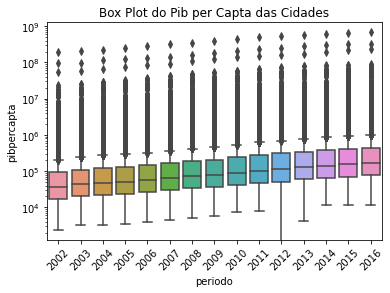

In [36]:
# sns.displot(dftest[dftest['periodo']==2016], x="pibpercapta", hist=False,kde_kws={'clip': (0.0, 8e7)})#bins=[0.25e7,0.5e7,1e7,2e7,3e7,4e7,5e7,6e7,7e7,8e7]
# sns.kdeplot(data=dftest[dftest['periodo']==2016], x="pibpercapta",clip=(0.0, 1e7));
fig, ax = plt.subplots()

# Set the scale of the x-and y-axes
ax.set( yscale="log")
plt.xticks(rotation=45)
plt.title('Box Plot do Pib per Capta das Cidades')
# plt.ylim([-10e8,10e8])

sns.boxplot(x="periodo", y="pibpercapta", data=dftest);

O visual engana bastante, pois o pib per capta do nosso dataset não leva em consideração as taxas de inflação

In [37]:
dftest[dftest['periodo']==2012]['pop'].describe()

count    5.565000e+03
mean     3.485652e+04
std      2.057822e+05
min      8.070000e+02
25%      5.254000e+03
50%      1.104200e+04
75%      2.374800e+04
max      1.137668e+07
Name: pop, dtype: float64

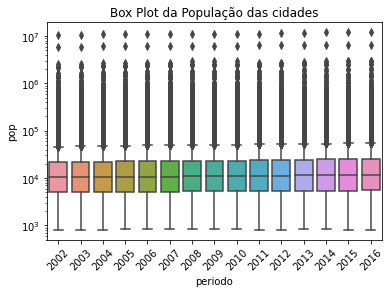

In [38]:
# sns.kdeplot(data=dftest[dftest['periodo']==2016],x='pop',clip=(0.0,0.2e6))
fig, ax = plt.subplots()

# Set the scale of the x-and y-axes
ax.set( yscale="log")
plt.xticks(rotation=45)
plt.title('Box Plot da População das cidades')

sns.boxplot(x="periodo", y="pop", data=dftest);

Text(0, 0.5, 'Homicídios das Cidades por 10000 Habitantes')

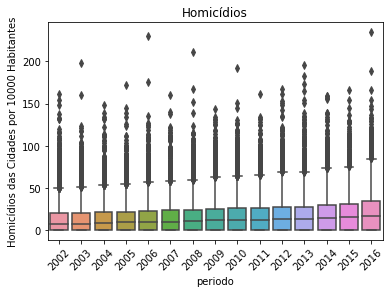

In [39]:
# sns.kdeplot(data=dftest[dftest['periodo']==2016],x='pop',clip=(0.0,0.2e6))
fig, ax = plt.subplots()

# Set the scale of the x-and y-axes
# ax.set( yscale="log")
plt.xticks(rotation=45)
plt.title('Homicídios')


sns.boxplot(x="periodo", y="homicidios", data=dftest)
plt.ylabel('Homicídios das Cidades por 10000 Habitantes')

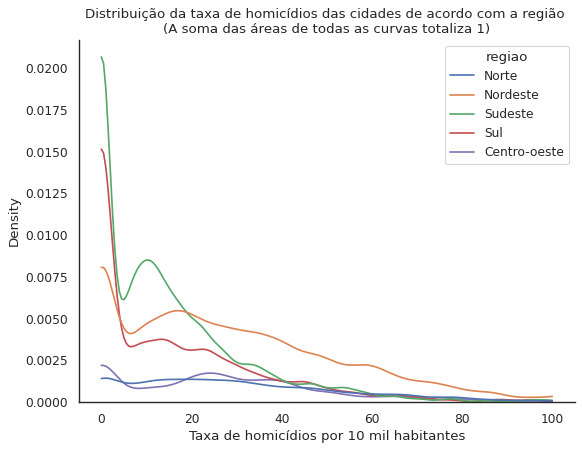

In [62]:
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
sns.kdeplot(data=dftest[dftest['periodo']==2016],x='homicidios', hue='regiao',clip=(0,100),bw_adjust=0.5,common_norm=True);
sns.despine()
# sns.set_theme(style="white")
sns.set_style("white")
plt.xlabel('Taxa de homicídios por 10 mil habitantes')
plt.title('Distribuição da taxa de homicídios das cidades de acordo com a região \n(A soma das áreas de todas as curvas totaliza 1)');


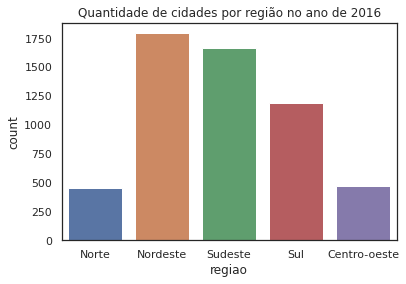

In [63]:

# sns.set_theme(style="darkgrid")
ax = sns.countplot(x="regiao", data=dftest[dftest['periodo']==2016])
plt.title('Quantidade de cidades por região no ano de 2016');

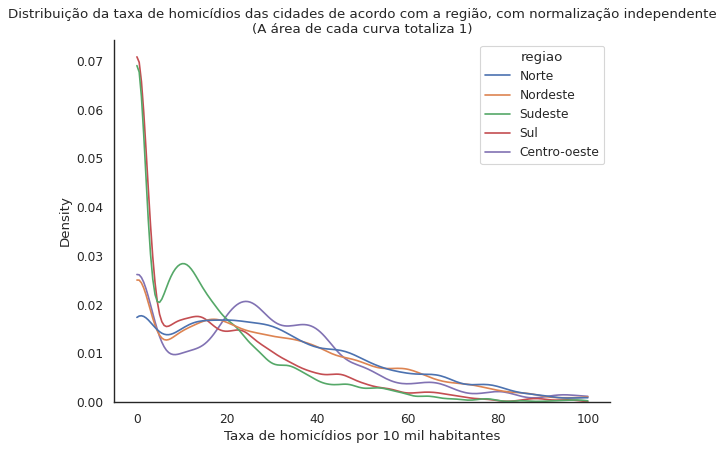

In [64]:
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
sns.kdeplot(data=dftest[dftest['periodo']==2016],x='homicidios', hue='regiao',clip=(0,100),bw_adjust=0.5,common_norm=False)
sns.despine()
plt.xlabel('Taxa de homicídios por 10 mil habitantes')
plt.title('Distribuição da taxa de homicídios das cidades de acordo com a região, com normalização independente\n(A área de cada curva totaliza 1)');


## Quantidade de municípios por categoria de pib per capta

Text(0.5, 1.0, 'Quantidade de municípios por categoria de PIB per Capta\n(Há repetição de municípios para cada ano)')

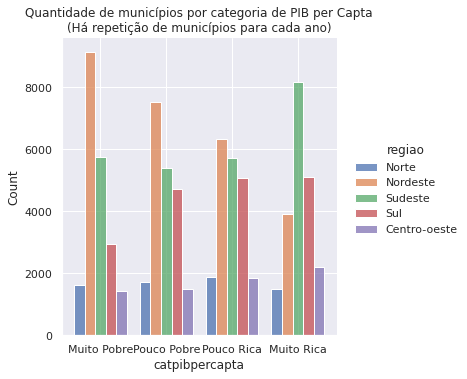

In [65]:
sns.set_theme(style="darkgrid")
sns.displot(data = dftest, x="catpibpercapta", hue="regiao", common_norm=False,multiple='dodge',shrink=0.8)
plt.title('Quantidade de municípios por categoria de PIB per Capta\n(Há repetição de municípios para cada ano)')

# Teste de Hipóteses: 
## 1 - Será que a taxa de homicídios vem subindo nas cidades brasileiras?

In [ ]:
#vamos pegar a taxa de homicidios
#queremos comparar 2002 e 2016, mas para isso só podemos pegar as cidades que estao presente em ambos
#para isso daremos um join
#pegamos os dados de 2002 e transformamos o cod em index
from scipy import stats
dfaux = dftest[dftest['periodo']==2002][['cod','homicidios']]
dfaux1 = dftest[dftest['periodo']==2016][['cod','homicidios']]
# dfaux.join(dfaux1)
res = pd.merge(dfaux,dfaux1,how='left',on='cod')
res[['homicidios_x', 'homicidios_y']].describe()
# stats.shapiro(res['homicidios_x'])
# dfaux
# dftest1 = pd.DataFrame({'homi2002':dftest[dftest['periodo']==2002]['homicidios'], 
#                         'homi2016':dftest[dftest['periodo']==2016]['homicidios']})
# dftest1
# dftest1[['homicidios']]

### Bem, é óbvio que as distribuições são diferentes, mas vamos fazer o teste para confirmar, porém primeiro devemos ver se as distribuições são Gaussianas ou não

In [ ]:
stats.shapiro(res['homicidios_x'])

### Devemos então utilizar um método não paramétrico, pois a distribuição não é Gaussiana

In [ ]:
stat, p = stats.wilcoxon(res['homicidios_x'], res['homicidios_y'])
print('p = ',p)
if p > 0.05:
	print('Como p é maior que 0.05, as distribuições são provavelmente iguais')
else:
	print('Como p é menor que 0.05, as distribuições são provavelmente diferentes')

### Mas será que com uma diferença de tempo menor já podemos confirmar uma diferença de maneira estatística?

In [ ]:
stat, p = stats.wilcoxon(dftest[dftest['periodo']==2002]['homicidios'], dftest[dftest['periodo']==2003]['homicidios'])
print('Comparando as taxas de homicídio de 2002 e 2003:')
print('p = ',p)
if p > 0.05:
	print('Como p é maior que 0.05, as distribuições são provavelmente iguais')
else:
	print('Como p é menor que 0.05, as distribuições são provavelmente diferentes')

stat, p = stats.wilcoxon(dftest[dftest['periodo']==2002]['homicidios'], dftest[dftest['periodo']==2004]['homicidios'])
print('Comparando as taxas de homicídio de 2002 e 2004:')
print('p = ',p)
if p > 0.05:
	print('Como p é maior que 0.05, as distribuições são provavelmente iguais')
else:
	print('Como p é menor que 0.05, as distribuições são provavelmente diferentes')

